## Importing required libraries and reading the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Downloading the file via its file ID
file_id = '1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW'
downloaded_path = f'/content/{file_id}.csv'

!gdown {file_id} --output {downloaded_path}

df = pd.read_csv(downloaded_path,low_memory=False)
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
From (redirected): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW&confirm=t&uuid=f5da1233-b2c1-458f-ac55-b08e14b4d262
To: /content/1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW.csv
100% 635M/635M [00:06<00:00, 98.1MB/s]


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


<Axes: >

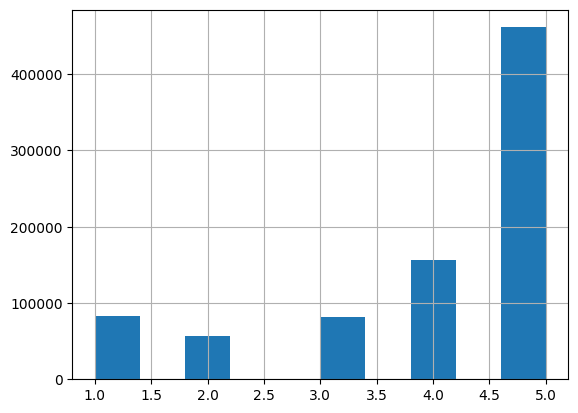

In [9]:
# Visualizing 'overall' column distribution

df['overall'].hist()

## Balancing the Dataset with Random Under-Sampling

In this section, we balance the dataset by reducing the number of samples in overrepresented classes using a mild under-sampling strategy.
The goal is to make the target variable (overall) more evenly distributed without losing too much information.

Original class distribution: Counter({5: 461485, 4: 156514, 1: 82950, 3: 81239, 2: 56756})
Target number of samples per class (median): 82950
Sampling strategy: {2: 56756, 5: 82950, 4: 82950, 3: 81239, 1: 82950}
Class distribution after balancing: Counter({1: 82950, 4: 82950, 5: 82950, 3: 81239, 2: 56756})
Final balanced DataFrame shape: (386845, 11)


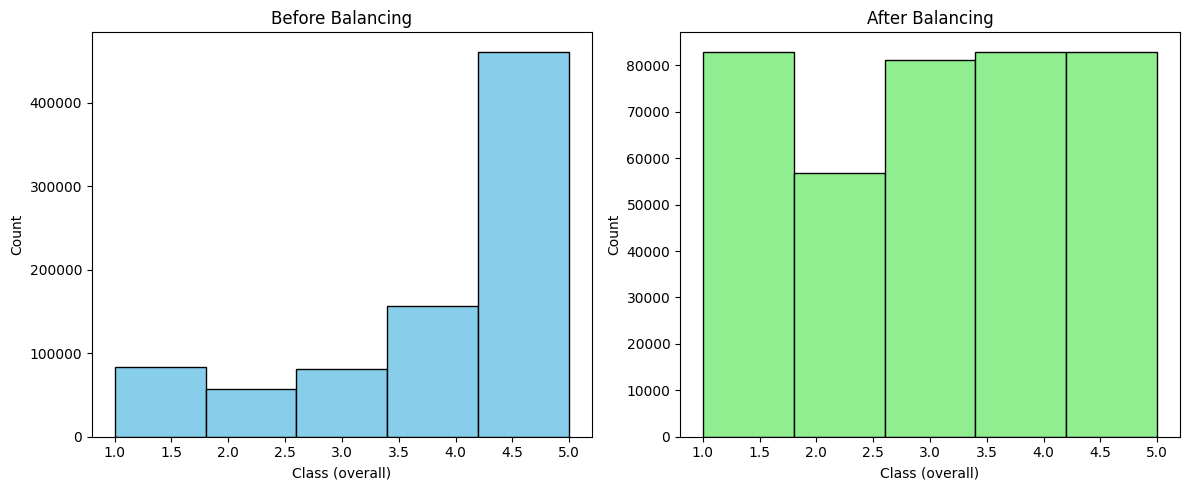

In [10]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


# 1️ Split features (X) and target (y)
X = df.drop('overall', axis=1)
y = df['overall']

# 2️ Count the number of samples in each class
class_counts = Counter(y)
print("Original class distribution:", class_counts)

# 3️ Define the target count per class as the median class size
target = int(np.median(list(class_counts.values())))
print("Target number of samples per class (median):", target)

# 4️ Create a mild under-sampling strategy
# Each class will have at most 'target' samples
sampling_strategy = {cls: min(cnt, target) for cls, cnt in class_counts.items()}
print("Sampling strategy:", sampling_strategy)

# 5️ Apply Random Under-Sampling
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# 6️ Build the new balanced DataFrame
df_balanced = pd.concat(
    [pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['overall'])],
    axis=1
)

# 7️ Print new class distribution and dataset size
print("Class distribution after balancing:", Counter(df_balanced['overall']))
print("Final balanced DataFrame shape:", df_balanced.shape)

# 8️ Plot histograms before and after balancing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before balancing
axes[0].hist(y, bins=len(class_counts), color='skyblue', edgecolor='black')
axes[0].set_title('Before Balancing')
axes[0].set_xlabel('Class (overall)')
axes[0].set_ylabel('Count')

# After balancing
axes[1].hist(df_balanced['overall'], bins=len(class_counts), color='lightgreen', edgecolor='black')
axes[1].set_title('After Balancing')
axes[1].set_xlabel('Class (overall)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Saving the balanced dataset to csv for further use and preprocess

In [12]:
from google.colab import drive
drive.mount('/content/drive')

# Save to Google Drive
df_balanced.to_csv("/content/drive/MyDrive/balanced_dataset.csv", index=False)

print("File saved to Google Drive as 'balanced_dataset.csv'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to Google Drive as 'balanced_dataset.csv'
